In [1]:
# Parameters
name = "2020-01-01-till-2021-02-28-tycho-brahe"
n_rows = None


# Clean : trip statistics

# Purpose
There are some outliers in the trip statistics that will need to be removed.

# Setup

In [2]:
# %load ../imports.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
width=20
height=3
plt.rcParams["figure.figsize"] = (width,height)
sns.set(rc={'figure.figsize':(width,height)})

#import seaborn as sns
import os
from collections import OrderedDict

from IPython.display import display

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

import folium
import plotly.express as px
import plotly.graph_objects as go

import sys
import os

import scipy.integrate
import seaborn as sns

import pyarrow as pa
import pyarrow.parquet as pq

import dask.dataframe

sys.path.append('../')
from src.visualization import visualize
import scipy.integrate

try:
    import trip_statistics
except:
    sys.path.append('../../../../src/models/pipelines/longterm/scripts/prepdata/trip_statistics')
    import trip_statistics

try:
    import trip_id,prepare_dataset,trips
except:
    sys.path.append('../../../../src/models/pipelines/longterm/scripts/prepdata/trip')
    import trip_id,prepare_dataset,trips

try:
    import clean_statistics
except:
    sys.path.append('../../../../src/models/pipelines/longterm/scripts/prepdata/clean_statistics')
    import clean_statistics

Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 462 ('figure.figsize   : 5, 3   ## figure size in inches')
Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 463 ('figure.dpi       : 100        ## figure dots per inch')


In [3]:
df_stat = trip_statistics.load_output_as_pandas_dataframe('id_statistics.parquet')
df_stat.head()

,latitude,longitude,heading,power_em_thruster_1,power_em_thruster_2,power_em_thruster_3,power_em_thruster_4,power_em_thruster_total,cog,sin_pm1,sin_pm2,sin_pm3,sin_pm4,cos_pm1,cos_pm2,cos_pm3,cos_pm4,power_heeling,sog,trip_no,trip_time,reversing,trip_direction,start_time,end_time,start_index,end_index
trip_no,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,56.037954,12.657033,66.737998,414.949513,445.467671,360.205492,355.449956,1576.072631,72.063481,-0.018140,0.014034,-0.211319,-0.166250,-0.672925,-0.675743,-0.809043,-0.803045,3.197520,4.410812,0.0,564.010629,0.0,0,2020-01-01 08:31:19+00:00,2020-01-01 08:50:15+00:00,0,1128
1.0,56.034732,12.654767,259.289806,371.334951,398.771845,402.959547,384.335761,1557.402104,254.945688,0.091474,0.168342,0.084861,0.074851,0.777466,0.791547,0.676049,0.679201,0.851133,4.057768,1.0,617.560680,1.0,1,2020-01-01 09:02:02+00:00,2020-01-01 09:22:52+00:00,1129,2364
2.0,56.037121,12.657407,66.003030,384.353535,403.802571,356.265381,348.166208,1492.587695,72.778990,0.006538,0.041393,-0.123441,-0.077197,-0.711043,-0.712979,-0.758449,-0.755415,2.035813,4.428171,2.0,544.000918,0.0,0,2020-01-01 09:31:04+00:00,2020-01-01 09:49:13+00:00,2365,3453
3.0,56.035049,12.653717,260.582487,493.094571,522.021016,496.622592,468.592820,1980.330998,255.338827,0.021302,0.097969,0.098880,0.087748,0.720291,0.731599,0.716466,0.718973,4.789842,4.354430,3.0,570.503503,1.0,1,2020-01-01 10:01:22+00:00,2020-01-01 10:20:25+00:00,3454,4595
4.0,56.037667,12.658731,66.705934,408.187609,436.029668,358.720768,348.050611,1550.988656,72.043185,0.009410,0.043116,-0.013878,0.039514,-0.657692,-0.658992,-0.696761,-0.695680,5.315009,4.270926,4.0,572.500000,0.0,0,2020-01-01 10:31:47+00:00,2020-01-01 10:50:52+00:00,4596,5741


In [4]:
df_stat.shape

(180, 27)

In [5]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 180 entries, 0.0 to 179.0
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   latitude                 180 non-null    float64            
 1   longitude                180 non-null    float64            
 2   heading                  180 non-null    float64            
 3   power_em_thruster_1      180 non-null    float64            
 4   power_em_thruster_2      180 non-null    float64            
 5   power_em_thruster_3      180 non-null    float64            
 6   power_em_thruster_4      180 non-null    float64            
 7   power_em_thruster_total  180 non-null    float64            
 8   cog                      180 non-null    float64            
 9   sin_pm1                  180 non-null    float64            
 10  sin_pm2                  180 non-null    float64            
 11  sin_pm3                  1

In [6]:
df_stat.describe()

,latitude,longitude,heading,power_em_thruster_1,power_em_thruster_2,power_em_thruster_3,power_em_thruster_4,power_em_thruster_total,cog,sin_pm1,sin_pm2,sin_pm3,sin_pm4,cos_pm1,cos_pm2,cos_pm3,cos_pm4,power_heeling,sog,trip_no,trip_time,reversing,trip_direction,start_index,end_index
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,56.036692,12.655672,166.834102,435.739364,463.983034,430.760922,415.323653,1745.806973,164.549741,-0.006298,0.044175,-0.001661,0.014598,0.031443,0.034216,-0.000498,0.002275,1.755038,4.276562,89.500000,568.806242,0.488889,0.500000,24561.972222,24588.355556
std,0.002222,0.005767,94.349079,72.769951,78.439446,105.279072,96.555508,325.947290,91.219760,0.152934,0.152298,0.166667,0.160679,0.715769,0.720609,0.730304,0.731486,1.647406,0.638004,52.105662,94.330628,0.501271,0.501395,14675.504030,14633.957041
min,56.032610,12.617400,58.467020,0.000000,0.000000,0.000000,0.000000,0.000000,62.470000,-0.904040,-0.912915,-0.849610,-0.870745,-0.811458,-0.813566,-0.819646,-0.819602,0.000000,0.205778,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000
25%,56.035046,12.654345,68.537546,409.185937,436.568353,364.988166,357.229247,1579.014835,72.977811,-0.057369,-0.016772,-0.065958,-0.048872,-0.683703,-0.684568,-0.739910,-0.739536,0.137564,4.266054,44.750000,549.375000,0.000000,0.000000,12084.500000,12083.500000
50%,56.036571,12.655652,250.349140,446.379809,475.821309,431.906196,418.116925,1771.064364,251.131313,-0.018309,0.039314,0.002206,0.023343,-0.042544,-0.063470,0.005247,0.049308,1.389212,4.369986,89.500000,575.750434,0.000000,0.500000,24626.000000,24625.000000
75%,56.037677,12.657306,257.141164,479.606461,510.009239,476.821208,459.039259,1918.397678,254.530063,0.038165,0.094103,0.060839,0.062347,0.754794,0.762207,0.736016,0.739198,2.927588,4.478323,134.250000,609.692623,1.000000,1.000000,37044.250000,37043.250000
max,56.043600,12.691100,265.882645,593.932859,634.737538,734.320000,696.483200,2482.384000,266.030000,0.970730,0.977910,1.000000,0.998050,0.823065,0.827937,0.814539,0.819207,7.037406,4.930513,179.000000,745.000000,1.000000,1.000000,49925.000000,49924.000000


# Clean

In [7]:
df_clean = clean_statistics.process(df=df_stat, path='id_statistics_clean.parquet')

In [8]:
df_compare = df_stat.copy()
df_compare['item'] = 'raw'

df_clean['item'] = 'clean'
df_compare = df_compare.append(df_clean)

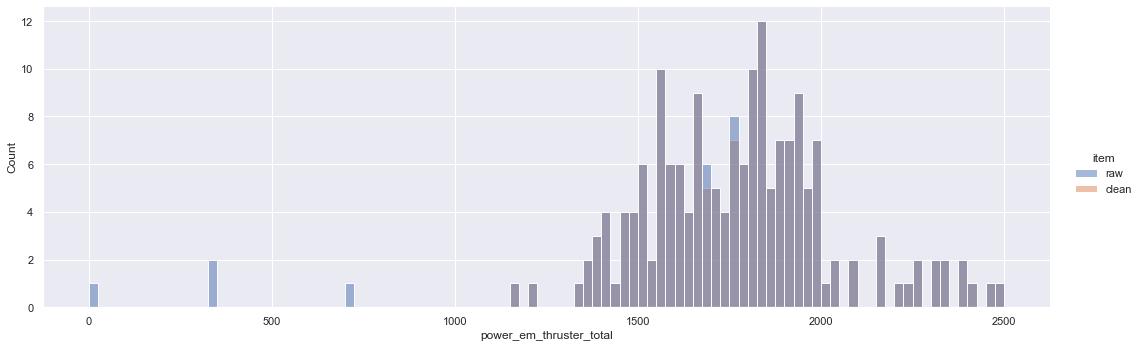

In [9]:
sns.displot(df_compare, x='power_em_thruster_total', hue='item', binwidth=25, aspect=3)

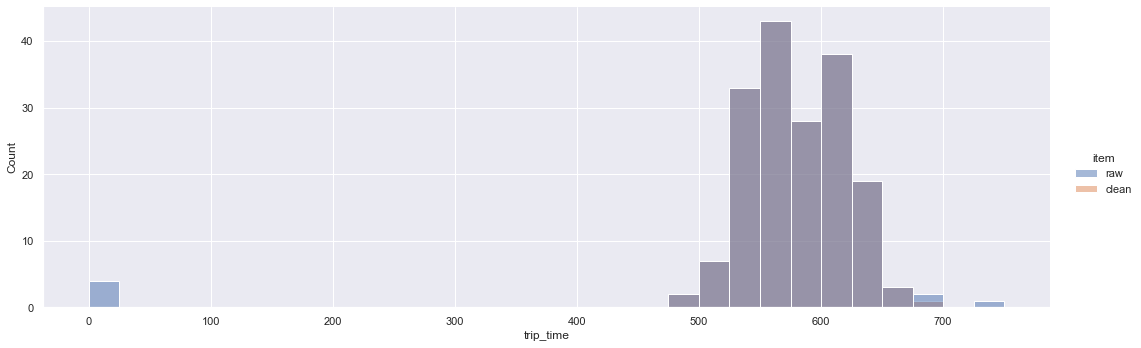

In [10]:
sns.displot(df_compare, x='trip_time', hue='item', binwidth=25, aspect=3)